### KNN classification

The goal of training a k-nearest-neighbor (KNN) machine learning model is to predict the type or class of the label, which makes the machine learning model a ***classification*** model. 

The k-nearest-neighbor algorithm is conceptually simple. In fact, there is no formal training step. Given a known set of cases, a new case is classified by majority vote of the K (where $k = 1, 2, 3$, etc.) points nearest to the values of the new case; that is, the nearest neighbors of the new case. 
 

In [23]:
import pandas as pd
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn

## Import the dataset from sklearn.datasets
iris = datasets.load_iris()

## Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species
print(iris.dtypes)

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object


In [24]:
iris['count'] = 1
iris[['Species', 'count']].groupby('Species').count()

count
Species          
setosa         50
versicolor     50
virginica      50

Create some plots to see how the classes might, or might not, be well separated by the value of the features. In an ideal case, the label classes will be perfectly separated by one or more of the feature pairs. In the real-world this ideal situation will rarely, if ever, be the case.

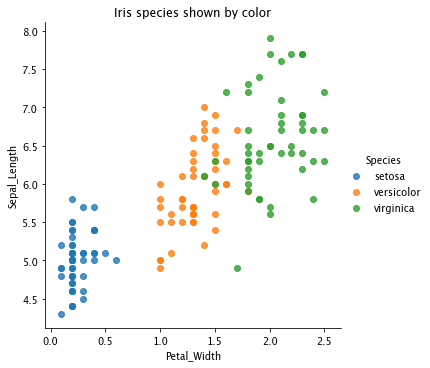

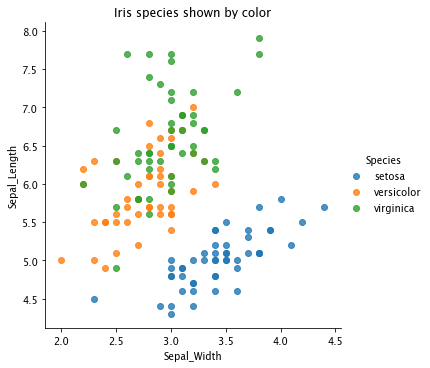

In [25]:
%matplotlib inline
def plot_iris(iris, col1, col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.lmplot(x = col1, y = col2, 
               data = iris, 
               hue = "Species", 
               fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species shown by color')
    plt.show()
plot_iris(iris, 'Petal_Width', 'Sepal_Length')
plot_iris(iris, 'Sepal_Width', 'Sepal_Length')

In [26]:
## Prepare the dataset

from sklearn.preprocessing import scale
import pandas as pd
num_cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
iris_scaled = scale(iris[num_columns])
iris_scaled = pd.DataFrame(iris_scaled, columns=num_cols)
print(iris_scaled.describe().round(3))

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count       150.000      150.000       150.000      150.000
mean         -0.000       -0.000        -0.000       -0.000
std           1.003        1.003         1.003        1.003
min          -1.870       -2.434        -1.568       -1.447
25%          -0.901       -0.592        -1.227       -1.184
50%          -0.053       -0.132         0.336        0.133
75%           0.675        0.559         0.763        0.791
max           2.492        3.091         1.786        1.712


In [27]:
levels = {'setosa':0, 'versicolor':1, 'virginica':2}
iris_scaled['Species'] = [levels[x] for x in iris['Species']]
iris_scaled.head()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Species
0     -0.900681     1.019004     -1.340227    -1.315444        0
1     -1.143017    -0.131979     -1.340227    -1.315444        0
2     -1.385353     0.328414     -1.397064    -1.315444        0
3     -1.506521     0.098217     -1.283389    -1.315444        0
4     -1.021849     1.249201     -1.340227    -1.315444        0

In [28]:
## Split the data into a training and test set by Bernoulli sampling
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3456)
iris_split = train_test_split(np.asmatrix(iris_scaled), test_size=75)
iris_train_features = iris_split[0][:, :4]
iris_train_labels = np.ravel(iris_split[0][:, 4])
iris_test_features = iris_split[1][:, :4]
iris_test_labels = np.ravel(iris_split[1][:, 4])
print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

(75, 4)
(75,)
(75, 4)
(75,)


In [29]:
## Define and train the KNN model (K = 3)
from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors=3)
KNN_mod.fit(iris_train_features, iris_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [30]:
# The predictions are scored as correct or not using a list comprehension.
# Accuracy is computed as the percentage of the test cases correctly classified.
iris_test = pd.DataFrame(iris_test_features, columns = num_cols)
iris_test['predicted'] = KNN_mod.predict(iris_test_features)
iris_test['correct'] = [1 if x == z else 0 for x, z in zip(iris_test['predicted'], iris_test_labels)]
accuracy = 100.0 * float(sum(iris_test['correct'])) / float(iris_test.shape[0])
print(accuracy)

96.0


'Done'

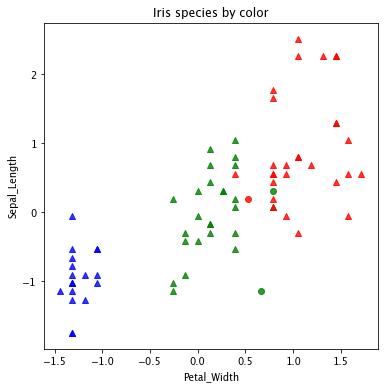

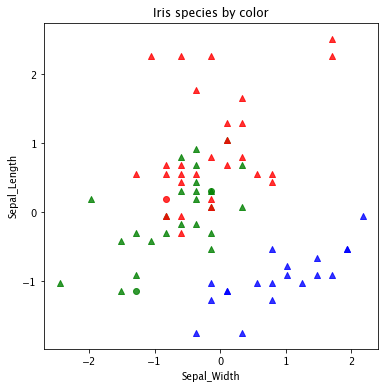

In [33]:
## Examine plots of the classifications of the iris species
# Correctly classified cases are shown by triangles and incorrectly classified cases are shown by circles

levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris_test['Species'] = [levels[x] for x in iris_test['predicted']]
markers = {1:'^', 0:'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
def plot_shapes(df, col1,col2,  markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers: # iterate over marker dictioary keys
        for c in colors: # iterate over color dictionary keys
            df_temp = df[(df['correct'] == m)  & (df['Species'] == c)]
            sns.regplot(x = col1, y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]},
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species by color')
    return 'Done'
plot_shapes(iris_test, 'Petal_Width', 'Sepal_Length', markers, colors)
plot_shapes(iris_test, 'Sepal_Width', 'Sepal_Length', markers, colors)